In [1]:
import pandas as pd
from annotation_data_model import AnnotationSample

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Article level

In [75]:
file_path = './data/annotaion_sample.xlsx'
article_number = 10

mfd_vers = {
    'mfd': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}, 
    'mfd2': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}, 
    'emfd': {'count_mf_relevance': [], 'count_mf_match': [], 'unit_num': []}
}

for mfd_ver, info_dict in mfd_vers.items():
    sample = AnnotationSample(file_path, article_number)
    sample.compute_mfd_count(mfd_ver)

    for i in range(len(sample.excel_sheets)):
        df = sample.excel_sheets[i]

        mfd_vers[mfd_ver]['count_mf_relevance'].append(df['MF Relevance'].sum())
        mfd_vers[mfd_ver]['count_mf_match'].append(df[f'{mfd_ver}_count'].sum())
        mfd_vers[mfd_ver]['unit_num'].append(len(df))

    mfd_vers[mfd_ver] = pd.DataFrame(mfd_vers[mfd_ver])

mfd_vers['mfd'] 

,count_mf_relevance,count_mf_match,unit_num
0,33,29,89
1,10,8,16
2,2,16,13
3,20,21,82
4,9,14,23
5,10,19,17
6,13,28,29
7,2,3,7
8,22,25,33
9,7,6,30


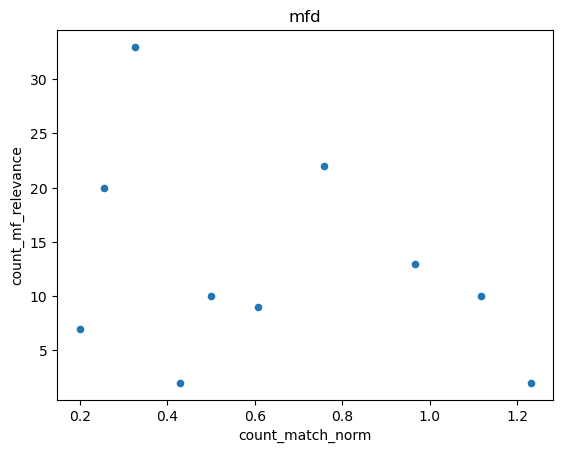

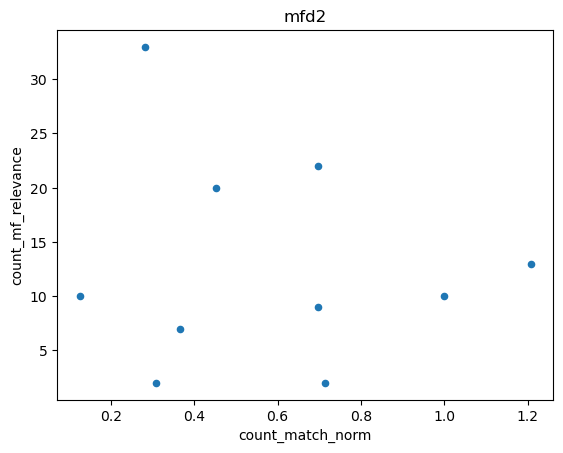

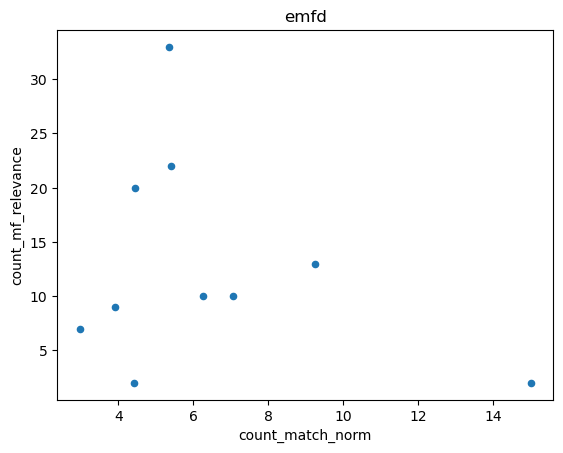

In [81]:
for mfd_ver, df in mfd_vers.items():
    mfd_vers[mfd_ver]['count_match_norm'] = df['count_mf_match'] / df['unit_num']
    mfd_vers[mfd_ver].plot.scatter(y='count_mf_relevance', x='count_match_norm', title=mfd_ver)

# `count_mf_relevance` is the total number of mf relevant label in an article.
# `count_match_norm` is the total number of words in an article matching with mfd, 
#  normalised by the number of unit.

### Sentence level (Independent from article level)
- Conclusion: mfd2 seems better in dictionary based methods.
- TODO:
    - Extend analysis to per MF.
    - Try DDR

#### MF

In [16]:
file_path = './data/annotaion_sample.xlsx'
article_number = 10

mfd_vers = {
    'mfd': None, 
    'mfd2': None, 
    'emfd': None
}

for mfd_ver in mfd_vers.keys():
    sample = AnnotationSample(file_path, article_number)
    sample.compute_mfd_count(mfd_ver)

    df_list = []
    for i in range(len(sample.excel_sheets)):
        df = sample.excel_sheets[i]
        df_list.append(df)
        df[f'{mfd_ver}_match_len'] = df[f'{mfd_ver}_match'].apply(lambda x: len(x) if x is not None else 0)
        df['sanity_check'] = df[f'{mfd_ver}_match_len'] - df[f'{mfd_ver}_count']
        if df['sanity_check'].sum() != 0:
            print(f'Something is wrong in the row(s) of dataframe [{i}] below.')
            print(df[df['sanity_check']!=0])
    
    mfd_vers[mfd_ver] = pd.concat(df_list)
    mfd_vers[mfd_ver] = mfd_vers[mfd_ver].reset_index(drop=True)

Something is wrong in the row(s) of dataframe [8] below.
                                           paragraphs  MF Relevance  \
3   “I remember living in a tent, I remember livin...             0   
4   Born in 1959 in Point McLeay Mission, now know...             1   
12  When she was finally allowed to legally return...             1   

    YES/NO Argument Relevance  mfd_count            mfd_match  mfd_match_len  \
3                           0          2              [ruins]              1   
4                           0          2            [legally]              1   
12                          0          3  [legally, families]              2   

    sanity_check  
3             -1  
4             -1  
12            -1  
Something is wrong in the row(s) of dataframe [9] below.
                                           paragraphs  MF Relevance  \
23  JAMES STEVENS, FEDERAL LIBERAL MP: I do think ...             1   

    YES/NO Argument Relevance  mfd_count mfd_match  mfd_match

               count_all  count_relevant  percentage
mfd_match_len                                       
0                    228              74    0.324561
1                     75              36    0.480000
2                     22               9    0.409091
3                     11               7    0.636364
4                      2               1    0.500000
5                      1               1    1.000000


<Axes: xlabel='mfd_match_len'>

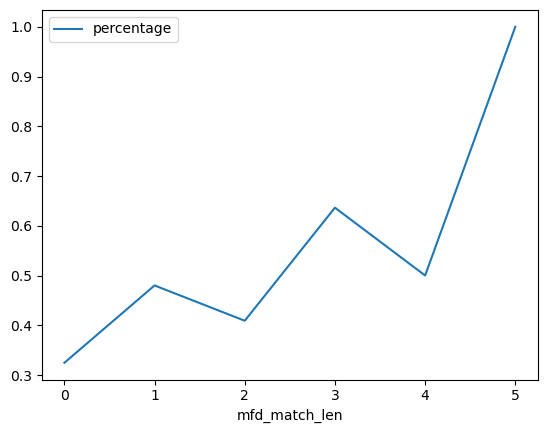

In [65]:
mfd_ver = 'mfd'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

                count_all  count_relevant  percentage
mfd2_match_len                                       
0                     218              63    0.288991
1                      82              38    0.463415
2                      30              19    0.633333
3                       4               3    0.750000
4                       4               4    1.000000
5                       1               1    1.000000


<Axes: xlabel='mfd2_match_len'>

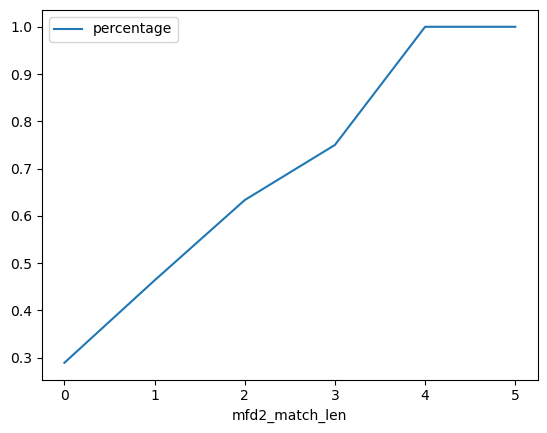

In [63]:
mfd_ver = 'mfd2'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

                count_all  count_relevant  percentage
emfd_match_len                                       
0                      27               2    0.074074
1                      23               4    0.173913
2                      32               4    0.125000
3                      31              10    0.322581
4                      40              15    0.375000
5                      29              15    0.517241
6                      36              17    0.472222
7                      30              11    0.366667
8                      29              18    0.620690
9                      16               9    0.562500
10                     11               8    0.727273
11                      7               2    0.285714
12                      5               5    1.000000
13                      5               2    0.400000
14                      4               1    0.250000
15                      6               4    0.666667
16                      1   

<Axes: xlabel='emfd_match_len'>

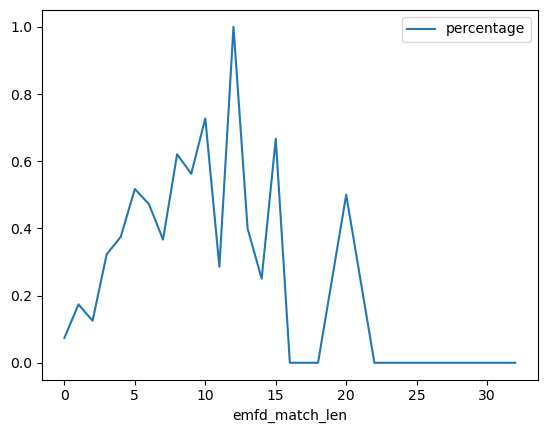

In [64]:
mfd_ver = 'emfd'
df_mfd = mfd_vers[mfd_ver]
df_agg = df_mfd.groupby(f'{mfd_ver}_match_len').count()[['MF Relevance']]
df_agg = df_agg.rename(columns={'MF Relevance': 'count_all'})
df_agg['count_relevant'] = df_mfd.groupby(f'{mfd_ver}_match_len').sum()[['MF Relevance']]
df_agg['percentage'] = df_agg['count_relevant'] / df_agg['count_all']
print(df_agg)
df_agg.plot(y='percentage', use_index=True)

In [44]:
mfd_ver = 'mfd2'
df_mfd = mfd_vers[mfd_ver]
num_relevance = df_mfd['MF Relevance'].sum()
total_num = len(df_mfd)

print('num_relevance', num_relevance)
print('total_num', total_num )
print('Percentage', num_relevance/total_num)

num_relevance 128
total_num 339
Percentage 0.3775811209439528
